In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
disease = pd.read_csv('heart_disease_eda.csv')

# Exploratory Data Analysis #

In [3]:
disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
disease.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
# use a pivot table to see how many people have stroke,smokes,alcohol drinking,asthma,kidney disease,skin cancer also has heart disease
# use a barplot to see out of each sex,age cat,race, how many have heart disease
# use a histogram to see the distribution of physical health, mental health,bmi,sleep time


In [7]:
hd = disease[disease['HeartDisease']=='Yes']

## Smoking ##
#### Majority of those with heart disease also smokes which seems to suggest that smoking could play a part in causing heart disease ####

In [8]:
hd.pivot_table(index='HeartDisease',columns='Smoking',aggfunc='count',values='Sex')/len(hd)*100

Smoking,No,Yes
HeartDisease,,
Yes,41.413071,58.586929


## Consumption of Alcohol ##
#### Only a very small percentage of those with heart disease also drinks alcohol hence I will leave alcohol out as one of the factors ####

In [9]:
hd.pivot_table(index='HeartDisease',columns='AlcoholDrinking',aggfunc='count',values='Sex')/len(hd)*100

AlcoholDrinking,No,Yes
HeartDisease,,
Yes,95.831659,4.168341


In [10]:
disease.drop('AlcoholDrinking',axis=1,inplace=True)

## History of Stroke ##
#### Only a very small percentage of those with heart disease also has a history of stroke hence I will leave stroke out as one of the factors ####

In [11]:
hd.pivot_table(index='HeartDisease',columns='Stroke',aggfunc='count',values='Sex')/len(hd)*100

Stroke,No,Yes
HeartDisease,,
Yes,83.965952,16.034048


In [12]:
disease.drop('Stroke',axis=1,inplace=True)

## Walking Difficulty ##
#### A moderate number of heart disease patients also have difficulty walking which could suggest that walking difficulty could be a side effect of heart disease. 
Based on my research, swelling in the legs,ankles and feets are some symptoms of a heart failure which would result in walking difficulty hence the data makese sense. 

In [13]:
hd.pivot_table(index='HeartDisease',columns='DiffWalking',aggfunc='count',values='Sex')/len(hd)*100

DiffWalking,No,Yes
HeartDisease,,
Yes,63.36536,36.63464


## Diabetes ##
#### A moderate number of heart disease patients also suffer from diabetes which could suggest that diabetes could be a side effect of heart disease or vice versa. 
Based on my research, high blood glucose from diabete can damage the nerves and blood vessels that controls the heart hence increasing the risk of heart disease.

In [14]:
hd.pivot_table(index='HeartDisease',columns='Diabetic',aggfunc='count',values='Sex')/len(hd)*100

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
Yes,64.001023,2.882402,32.722025,0.394549


In [15]:
disease['Diabetic'] = disease['Diabetic'].map({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes','Yes':'Yes','No':'No'})

## Amount of Physical Activity ##
#### A moderate number of heart disease patients also do not engage in physical activities which could suggest that an absence of physical activities increase the risk of heart disease.

In [16]:
hd.pivot_table(index='HeartDisease',columns='PhysicalActivity',aggfunc='count',values='Sex')/len(hd)*100

PhysicalActivity,No,Yes
HeartDisease,,
Yes,36.108574,63.891426


## Asthma ##
#### Only a small number of heart disease patients also suffer from asthma hence I will drop it as one of the factors to consider.

In [17]:
hd.pivot_table(index='HeartDisease',columns='Asthma',aggfunc='count',values='Sex')/len(hd)*100## Diabetes ##

Asthma,No,Yes
HeartDisease,,
Yes,81.978592,18.021408


In [18]:
disease.drop('Asthma',axis=1,inplace=True)

## History of Kidney Disease ##
#### Only a small number of heart disease patients also suffer from kidney disease hence I will drop it as one of the factors to consider.

In [19]:
hd.pivot_table(index='HeartDisease',columns='KidneyDisease',aggfunc='count',values='Sex')/len(hd)*100

KidneyDisease,No,Yes
HeartDisease,,
Yes,87.378073,12.621927


In [20]:
disease.drop('KidneyDisease',axis=1,inplace=True)

## History of Skin Cancer ##
#### Only a small number of heart disease patients also suffer from skin cancer hence I will drop it as one of the factors to consider.

In [21]:
hd.pivot_table(index='HeartDisease',columns='SkinCancer',aggfunc='count',values='Sex')/len(hd)*100

SkinCancer,No,Yes
HeartDisease,,
Yes,81.80689,18.19311


In [22]:
disease.drop('SkinCancer',axis=1,inplace=True)

## Which gender is more susceptible to heart disease? ##
#### Based on the table, males are much more likely to get heart disease than females ####

In [23]:
hd.pivot_table(index='HeartDisease',columns='Sex',aggfunc='count',values='Race')/len(hd)*100

Sex,Female,Male
HeartDisease,,
Yes,41.040441,58.959559


# Data Visualisation #

## In which BMI range will a person be more susceptible to Heart Disease? ## 
#### Most heart disease patients have BMI that falls between 25 and 32. ####

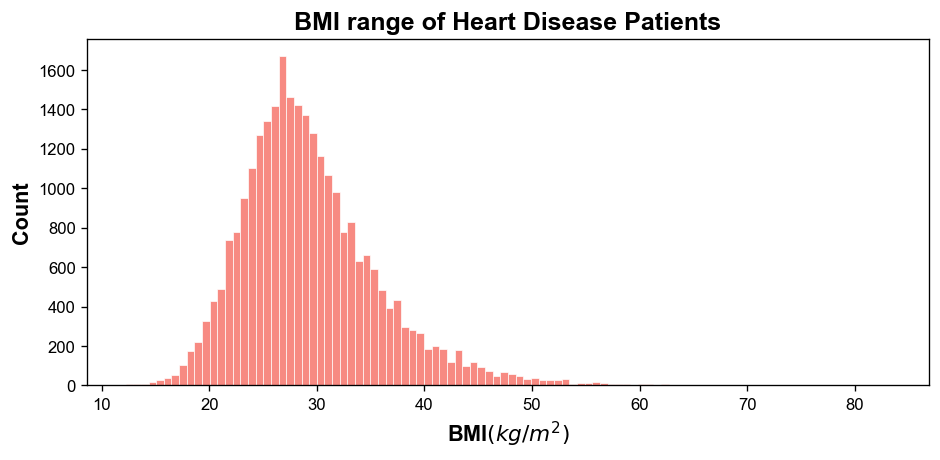

In [24]:
fig,axes = plt.subplots(figsize=(8,4),dpi=120)
sns.set(style='darkgrid')
sns.histplot(data=hd,x='BMI',bins=100,color='#f56358')
axes.set_xlabel(r'BMI$(kg/m^2)$',fontsize=13,fontweight='bold')
axes.set_ylabel(r'Count',fontsize=13,fontweight='bold')
axes.tick_params(axis='both',labelsize=10)
plt.title('BMI range of Heart Disease Patients',fontsize=15,fontweight='bold')
plt.tight_layout()

## Is there a particular race that is the more susceptible to Heart Disease? ##
The donut chart suggests that a huge majority of the heart disease patients are the Whites. However, this may not be indicative that the Whites are the most susceptible to heart diseases as the research could have been conducted in America and an overwhelming majority of the respondants are Whites.

Hence, finding out the percentage of each race with heart disease is more indicative which race is more susceptible. Based on the barplot below, there is a highest percentage of American Indian / Alaskan Natives who have heart disease, followed by the Whites.

Text(0.5, 1.0, 'Proportion of Different Races with Heart Disease')

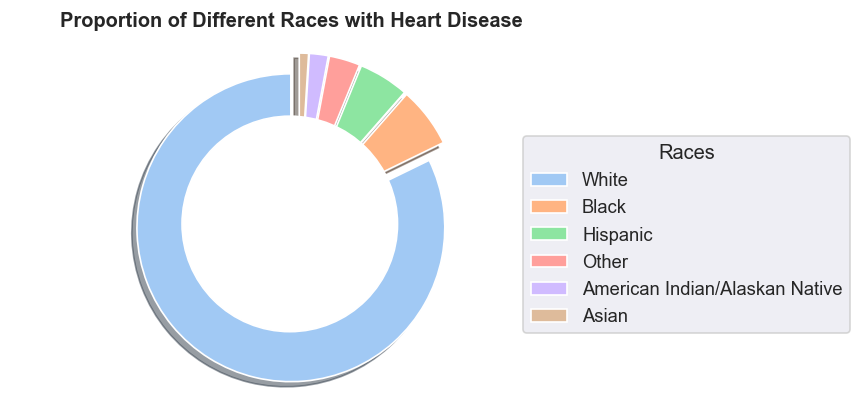

In [25]:
data = hd['Race'].value_counts()
labels = data.keys()
explode = (0.1,0.05,0.05,0.05,0.05,0.05)
colors = sns.color_palette("pastel")

fig,ax = plt.subplots(dpi=120)
ax.pie(data,explode=explode,shadow=True,colors=colors,startangle=90)
centre_circle = plt.Circle((-0.06,-0.06),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.legend(labels,bbox_to_anchor=(0.9,0.75),title='Races')
plt.title('Proportion of Different Races with Heart Disease',fontweight='bold')

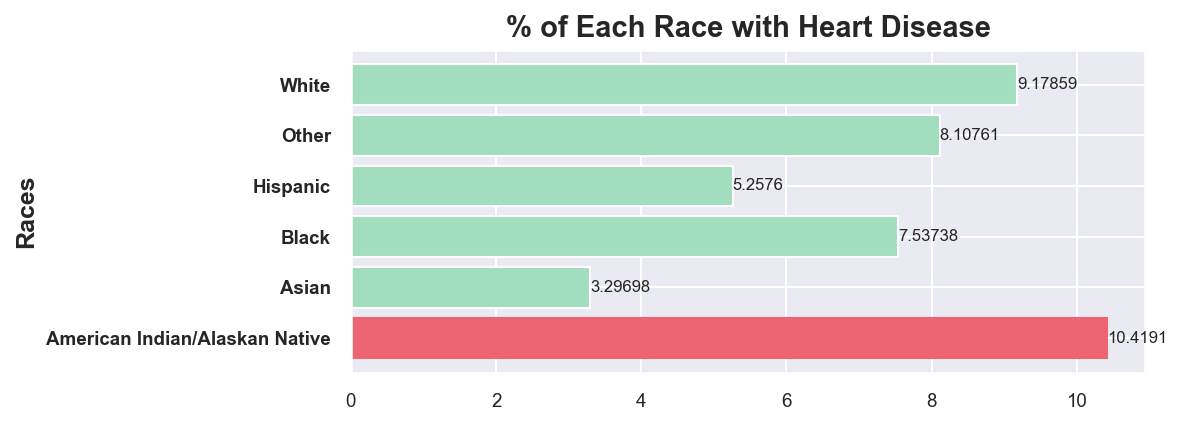

In [26]:
data = hd['Race'].value_counts()/disease['Race'].value_counts()*100
fig,ax = plt.subplots(figsize=(8,3),dpi=150)
ax.barh(data.keys(),width=data,color='#A2DEBD')
ax.patches[0].set_color('#ED6572')
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_ylabel(r'Races',fontsize=12,fontweight='bold')
ax.tick_params(axis='both',labelsize=9)
plt.yticks(weight='bold')
plt.title('% of Each Race with Heart Disease',fontsize=14,fontweight='bold')
plt.tight_layout()

## Does Higher in Age mean Higher Likelihood in getting Heart Disease? ## 
Generally, as age increases, the probability of getting heart disease also increases.

In [27]:
hd['AgeCategory'].value_counts()

80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: AgeCategory, dtype: int64

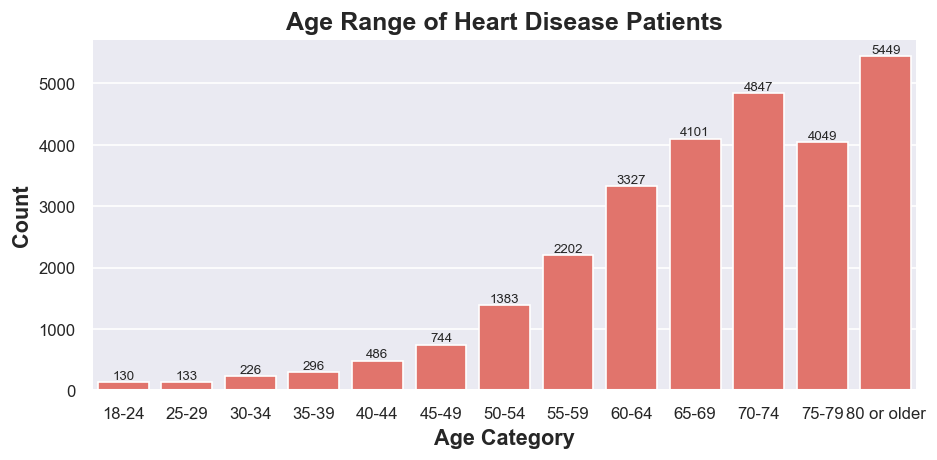

In [28]:
data = hd['AgeCategory'].value_counts()/disease['AgeCategory'].value_counts()*100

fig,axes = plt.subplots(figsize=(8,4),dpi=120)
sns.set(style='darkgrid')
sns.countplot(data=hd,x='AgeCategory',color='#f56358',order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'])
axes.bar_label(axes.containers[0],fontsize=8)
axes.set_xlabel(r'Age Category',fontsize=13,fontweight='bold')
axes.set_ylabel(r'Count',fontsize=13,fontweight='bold')
axes.tick_params(axis='both',labelsize=10)
plt.title('Age Range of Heart Disease Patients',fontsize=15,fontweight='bold')
plt.tight_layout()

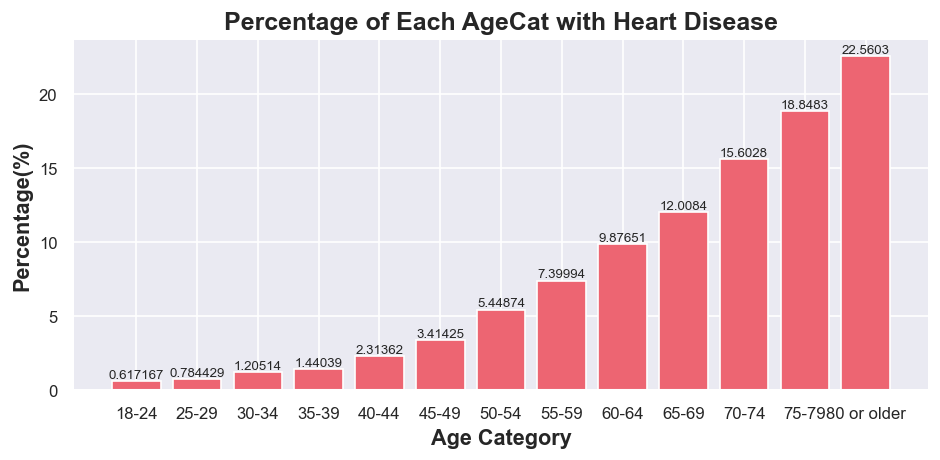

In [29]:
data = hd['AgeCategory'].value_counts()/disease['AgeCategory'].value_counts()*100

fig,axes = plt.subplots(figsize=(8,4),dpi=120)
sns.set(style='darkgrid')
axes.bar(data.keys(),height=data,color='#ED6572')
axes.bar_label(axes.containers[0],fontsize=8)
axes.set_xlabel(r'Age Category',fontsize=13,fontweight='bold')
axes.set_ylabel(r'Percentage(%)',fontsize=13,fontweight='bold')
axes.tick_params(axis='both',labelsize=10)
plt.title('Percentage of Each AgeCat with Heart Disease',fontsize=15,fontweight='bold')
plt.tight_layout()

## Does Sleep Time Affects the Chances of getting Heart Disease? ##
From the bar chart, there doesn't seem to have an obvious pattern between sleep time and those having heart disease. Hence, I will drop this as a factor.

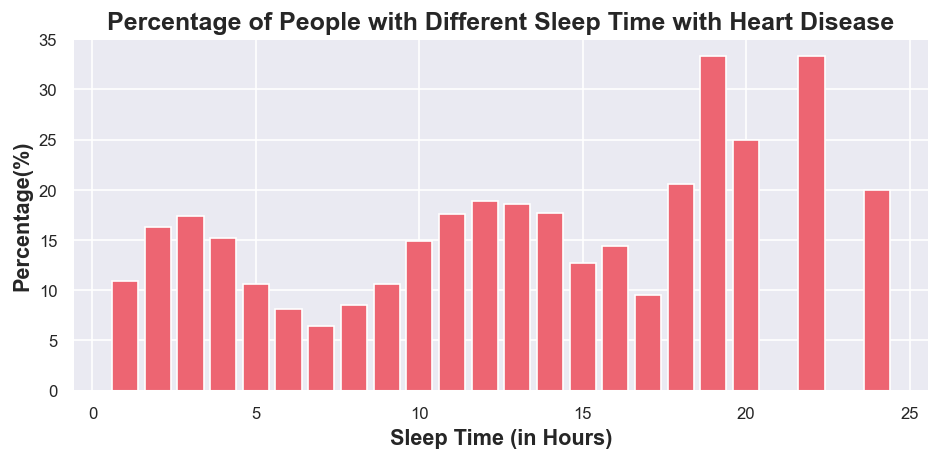

In [30]:
data = hd['SleepTime'].value_counts()/disease['SleepTime'].value_counts()*100

fig,axes = plt.subplots(figsize=(8,4),dpi=120)
sns.set(style='darkgrid')
axes.bar(data.keys(),height=data,color='#ED6572')
axes.set_xlabel(r'Sleep Time (in Hours)',fontsize=13,fontweight='bold')
axes.set_ylabel(r'Percentage(%)',fontsize=13,fontweight='bold')
axes.tick_params(axis='both',labelsize=10)
plt.title('Percentage of People with Different Sleep Time with Heart Disease',fontsize=15,fontweight='bold')
plt.tight_layout()

In [31]:
disease.drop('SleepTime',axis=1,inplace=True)

# Feature Engineering #

In [32]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   PhysicalHealth    319795 non-null  float64
 4   MentalHealth      319795 non-null  float64
 5   DiffWalking       319795 non-null  object 
 6   Sex               319795 non-null  object 
 7   AgeCategory       319795 non-null  object 
 8   Race              319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
dtypes: float64(3), object(9)
memory usage: 29.3+ MB


In [33]:
disease['HeartDisease'] = disease['HeartDisease'].map({'No':0,'Yes':1})

In [34]:
objs = disease.select_dtypes(include='object')
nums = disease.select_dtypes(exclude='object')

In [35]:
objs = pd.get_dummies(objs,drop_first=True)

In [36]:
disease_ml = pd.concat([nums,objs],axis=1)

In [37]:
X = disease_ml.drop('HeartDisease',axis=1)
y = disease_ml['HeartDisease']

# Train-Test-Split #

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)

# Feature Scaling #

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression #

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model = LogisticRegression(solver='saga',max_iter=5000)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)
param_grid = {'penalty':penalty,'C':C}

gridsearch = GridSearchCV(estimator=log_model,param_grid=param_grid,cv=5,scoring='f1')

In [47]:
gridsearch.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [48]:
gridsearch.best_estimator_

LogisticRegression(max_iter=5000, penalty='l1', solver='saga')

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,f1_score

In [50]:
test_pred = gridsearch.predict(scaled_X_test)

In [51]:
f1_score(y_test,test_pred)

0.11926487597995115

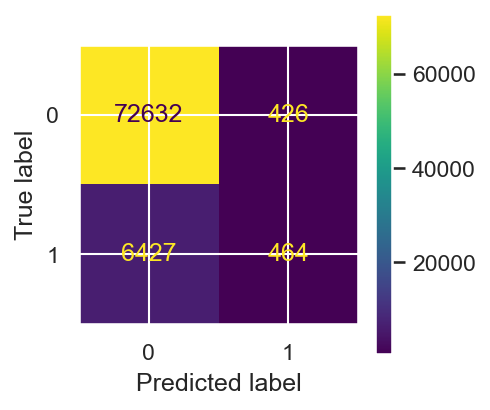

In [52]:
fig,ax = plt.subplots(figsize=(3,3),dpi=150)
plot_confusion_matrix(gridsearch,scaled_X_test,y_test,ax=ax)

In [53]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73058
           1       0.52      0.07      0.12      6891

    accuracy                           0.91     79949
   macro avg       0.72      0.53      0.54     79949
weighted avg       0.88      0.91      0.88     79949



## Evaluation of the first Logistic Regression Model ##
The predicted test result is unsatisfactory as the scores for predicting that an individual is indeed a heart disease patient is very low. This is because the dataset used is skewed towards non heart disease patients and our model does not have enough information on those with heart disease hence majority of the prediction will be a negative result. 

#### To improve the model, I will be using class weight in the hyper parameter and  use F1 score to weigh the score of the predicted results. ####

In [54]:
log_model2 = LogisticRegression(max_iter=5000,solver='saga',class_weight='balanced')

penalty = ['l1','l2']
C = np.logspace(0,4,10)
param_grid = {'penalty':penalty,'C':C}

gridsearch2 = GridSearchCV(estimator=log_model2,param_grid=param_grid,cv=5,scoring='f1')

In [55]:
gridsearch2.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [56]:
test_pred2 = gridsearch2.predict(scaled_X_test)

In [57]:
gridsearch2.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

In [58]:
f1_score(y_test,test_pred2)

0.3382800489442475

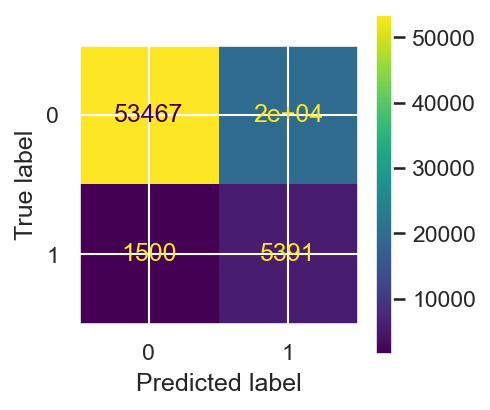

In [59]:
fig,ax = plt.subplots(figsize=(3,3),dpi=150)
plot_confusion_matrix(gridsearch2,scaled_X_test,y_test,ax=ax)

In [60]:
print(classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     73058
           1       0.22      0.78      0.34      6891

    accuracy                           0.74     79949
   macro avg       0.59      0.76      0.59     79949
weighted avg       0.91      0.74      0.79     79949



## Evaluation of the second Logistic Regression Model
Generally, the second model performs better because the number of false negative is much lower compared to the first. However, the number is still quite high and perhaps I can explore modelling using k nearest neighbour or support vector machine instead.